# ------------------------------------Stroke_Detectors_Data_Exploration_&_Preprocessing-------------------------------------

## Importing the Universal Libraries which will be used throughrout the Project:

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

## Reading the Dataset:-

In [2]:
warnings.filterwarnings(action='ignore')#for Ignoring warnings if any generated
Stroke_Detectors_Data = pd.read_csv('Stroke_Detector_Dataset.csv')#Reading the Dataset
Stroke_Detectors_Data.head()#Displaying first 5 rows of the Dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Displaying Shape of Dataset:-

In [3]:
Stroke_Detectors_Data_rows_num, Stroke_Detectors_Data_columns_num= Stroke_Detectors_Data.shape#Here the number of rows and colums are fed to the variables
print('Number of Rows:', Stroke_Detectors_Data_rows_num)
print('Number of Columns:', Stroke_Detectors_Data_columns_num)

Number of Rows: 5110
Number of Columns: 12


## The above output shows that there are 12 Features and 5110 Instances in our dataset

## Now Displaying the Datatypes of Each Feature:

In [4]:
Stroke_Detectors_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## The above output shows that there are 4 features having Integer values, 3 features having Float values and 5 features have object datatype which means they have String Datatype

# So Now for the Data Pre-processing (Replacing/Removing Null Values, Handling Outliers, Correcting the object64 Datatypes and Checking for Cardinalities) will be done:

## Checking the Number of Null Values each Feature Has:-

In [5]:
Stroke_Detectors_Data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## As from the above Illustration we can see that "bmi" is the only feature having null values so replacing the null values with the MEAN of all the feature values of "bmi" will be a Good Choice:

In [6]:
Stroke_Detectors_Data['bmi'] = Stroke_Detectors_Data['bmi'].fillna(Stroke_Detectors_Data['bmi'].mean())
Stroke_Detectors_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## So from the above Illustration we can see that none of the Features has Null Values now

# Creating a Data Quality Report of all the Continuous Features:

In [7]:
Stroke_Detectors_Data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Checking Unique Id's of the dataset:

In [8]:
Stroke_Detectors_Data.id.nunique()

5110

## As we can see from the above results that the total number of unique id's are same as number of rows so we do not need another feature id to keep a track and thus, we will drop this feature:

In [9]:
Stroke_Detectors_Data = Stroke_Detectors_Data.drop(columns ='id')
Stroke_Detectors_Data.shape

(5110, 11)

## Checking types of values in the "gender" feature:

In [10]:
Stroke_Detectors_Data.info()
Stroke_Detectors_Data.gender.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

## As "gender" should be a categorical feature having binary values so replacing "Other" with the MODE of the feature will be a good Idea:

In [11]:
Stroke_Detectors_Data['gender'] = Stroke_Detectors_Data['gender'].replace('Other', list(Stroke_Detectors_Data.gender.mode().values)[0])
Stroke_Detectors_Data.gender.value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

In [12]:
Stroke_Detectors_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## For a better visualization of our numerical features and the outliers, we use box plots

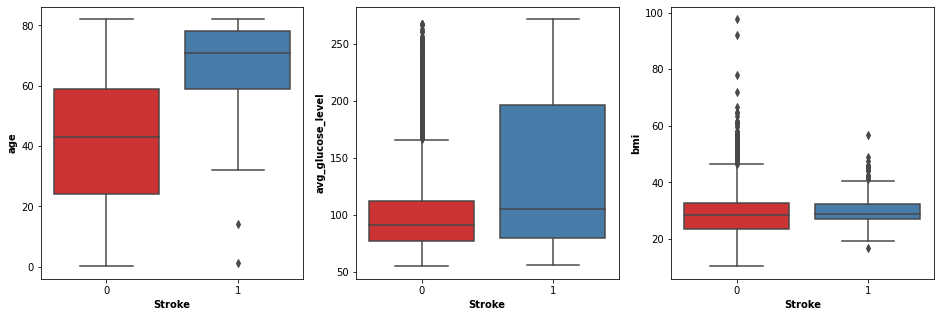

In [13]:
df_num = ['age', 'avg_glucose_level', 'bmi']

fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()

# iterate through each column in df_num and plot
for i, col_name in enumerate(df_num):
    sns.boxplot(x="stroke", y=col_name, data=Stroke_Detectors_Data,ax=axs[i],palette = 'Set1')
    axs[i].set_xlabel("Stroke", weight = 'bold')
    axs[i].set_ylabel(col_name, weight='bold')

## from the above results we can conclude a relationship between stroke and "age" and "avg_glucose_level". The line in the middle of box plots indicates mean and people with higher mean age tend to have higher rate of stroke. Additionally, higher average glocuse level has higher chance of having stroke. We see that bmi doesn't indicate any significant results, but it does have a number of outliers

In [14]:
bmi_outliers=Stroke_Detectors_Data.loc[Stroke_Detectors_Data['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

## We see that we have the total number of 79 outliers. Outliers above 50 should be replaced with the highest bmi value which is 50

In [15]:
Stroke_Detectors_Data["bmi"] = pd.to_numeric(Stroke_Detectors_Data["bmi"])
Stroke_Detectors_Data["bmi"] = Stroke_Detectors_Data["bmi"].apply(lambda x: 50 if x>50 else x)

## After imputing the outliers, we plot the new bmi distribution to see how it has changed

Text(0.5, 1.0, 'Boxplot of BMI Distribution')

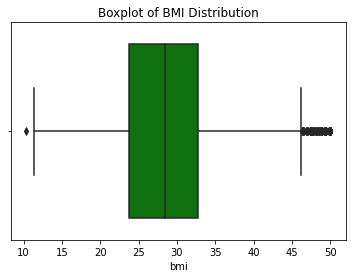

In [16]:
sns.boxplot(data=Stroke_Detectors_Data,x=Stroke_Detectors_Data["bmi"],color='green')
plt.title("Boxplot of BMI Distribution")

## We will also create a piechart to see the distribution of the people who had stroke and the ones that did not. It indicates that out of 5110 individuals in the dataset, 95.1% did not have stroke, while only 4.9% had stroke. In other words, the majority of the dataset has the value of zero (or false) for target feature

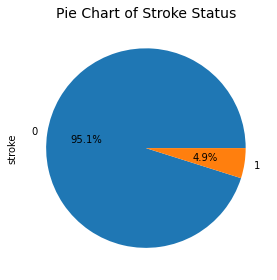

In [17]:
plt.figure(figsize=(4,4))
Stroke_Detectors_Data['stroke'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Pie Chart of Stroke Status", fontdict={'fontsize': 14})
plt.tight_layout()

## Data Transformation(Extra Credits):
## Below we performed Data Manipulation, Data Encoding, Data Normalization and Data Discretisation

## We have a few categorical features in our dataset such as "gender", "ever_married", "work_type", "residence_type", and "smoking_status". For data transformation, we use label Encoder to normalize this data

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Stroke_Detectors_Data['gender'] = le.fit_transform(Stroke_Detectors_Data['gender'])
Stroke_Detectors_Data['ever_married'] = le.fit_transform(Stroke_Detectors_Data['ever_married'])
Stroke_Detectors_Data['work_type'] = le.fit_transform(Stroke_Detectors_Data['work_type'])
Stroke_Detectors_Data['Residence_type'] = le.fit_transform(Stroke_Detectors_Data['Residence_type'])
Stroke_Detectors_Data['smoking_status'] = le.fit_transform(Stroke_Detectors_Data['smoking_status'])

df_encoded = Stroke_Detectors_Data
df_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


## Below, we also plot a heatmap to better see the distribution of the corellations between the features. It shows that "age" and "ever_married" features have high correlation with each other. In other words, what ever results ever_married gives, age can also give those results. However, age feature is more informative, therefore we drop ever_married as it doesn't give us any new information. 

<AxesSubplot:>

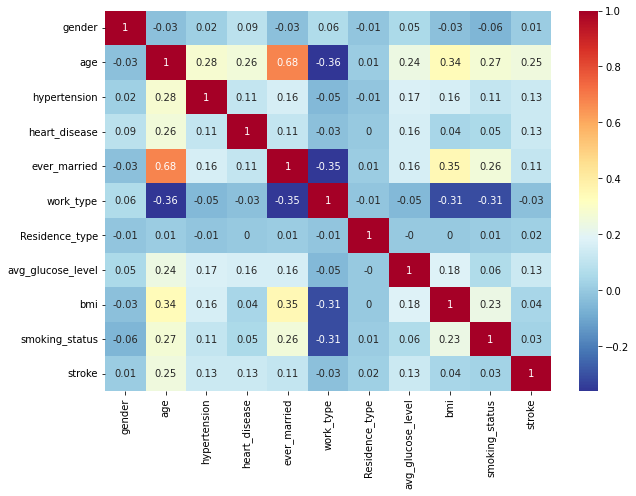

In [19]:
corr = df_encoded.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'RdYlBu_r')

## Droping "ever_married" Feature:

In [23]:
df_encoded = df_encoded.drop(['ever_married'], axis = 1)
df_encoded.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,3,0,174.12,24.000000,2,1


## For final pre_processing, we use standard scaler. Since our features are measured based on different scales, they may create inconsistency when training the model. So we use StandardScaler module to reduce bias in our data so it fits better to our model

In [24]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
columns = ['avg_glucose_level','bmi','age']
stand_scaled = s.fit_transform(df_encoded[['avg_glucose_level','bmi','age']])
stand_scaled = pd.DataFrame(stand_scaled,columns=columns)

df_en=df_encoded.drop(columns=columns,axis=1)
stand_scaled.head()

,avg_glucose_level,bmi,age
0,2.706375,1.066746,1.051434
1,2.121559,0.013363,0.786070
2,-0.005028,0.506346,1.626390
3,1.437358,0.766044,0.255342
4,1.501184,-0.655458,1.582163


In [26]:
df = pd.concat([df_en, stand_scaled], axis=1)
df.head()
df_temp=df["stroke"]
df=df.drop(['stroke'], axis=1)
df = pd.concat([df,df_temp], axis=1)
df.head()

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,avg_glucose_level,bmi,age,stroke
0,1,0,1,2,1,1,2.706375,1.066746,1.051434,1
1,0,0,0,3,0,2,2.121559,0.013363,0.786070,1
2,1,0,1,2,0,2,-0.005028,0.506346,1.626390,1
3,0,0,0,2,1,3,1.437358,0.766044,0.255342,1
4,0,1,0,3,0,2,1.501184,-0.655458,1.582163,1


## Plotting Pairplot for the Preprocessed Dataset:

<Figure size 1080x1080 with 0 Axes>

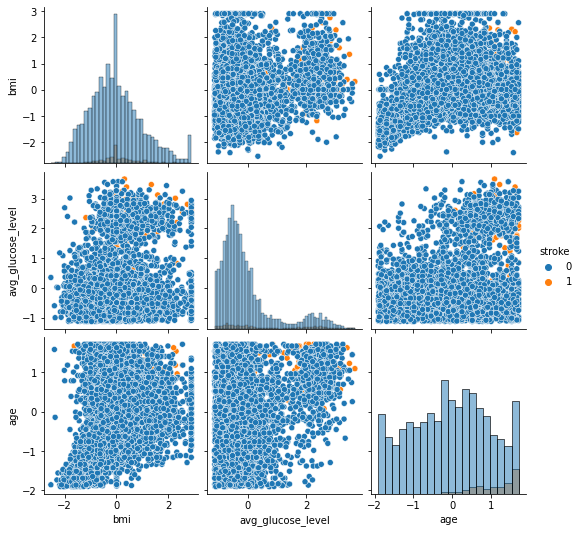

In [27]:
plt.figure(figsize = (15,15))
sns.pairplot(df, x_vars = ['bmi', 'avg_glucose_level', 'age'], y_vars = ['bmi', 'avg_glucose_level', 'age'], hue = 'stroke', diag_kind = 'hist')

## Feature Selection Method 1(Extra Credits):

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
x=df.drop(['stroke'], axis=1)
y=df["stroke"]
fet_selector = SelectFromModel(estimator=LogisticRegression()).fit(x, y)
print("Estimator Coefficients :\n",fet_selector.estimator_.coef_)
print("Threshold: ",fet_selector.threshold_)
print("Are the Features Informative?",fet_selector.get_support())

Estimator Coefficients :
 [[ 4.43492415e-02  3.81249959e-01  3.25871808e-01 -4.75219552e-02
   1.01427974e-01 -8.80754884e-04  1.82963854e-01  1.67272433e-02
   1.55180084e+00]]
Threshold:  0.2947548479698894
Are the Features Informative? [False  True  True False False False False False  True]


## We can see from the above output that "hypertension", "heart_disease" and "age" are the most Informative(discriptive) features.

## Feature Selection Method 2(Extra Credits):

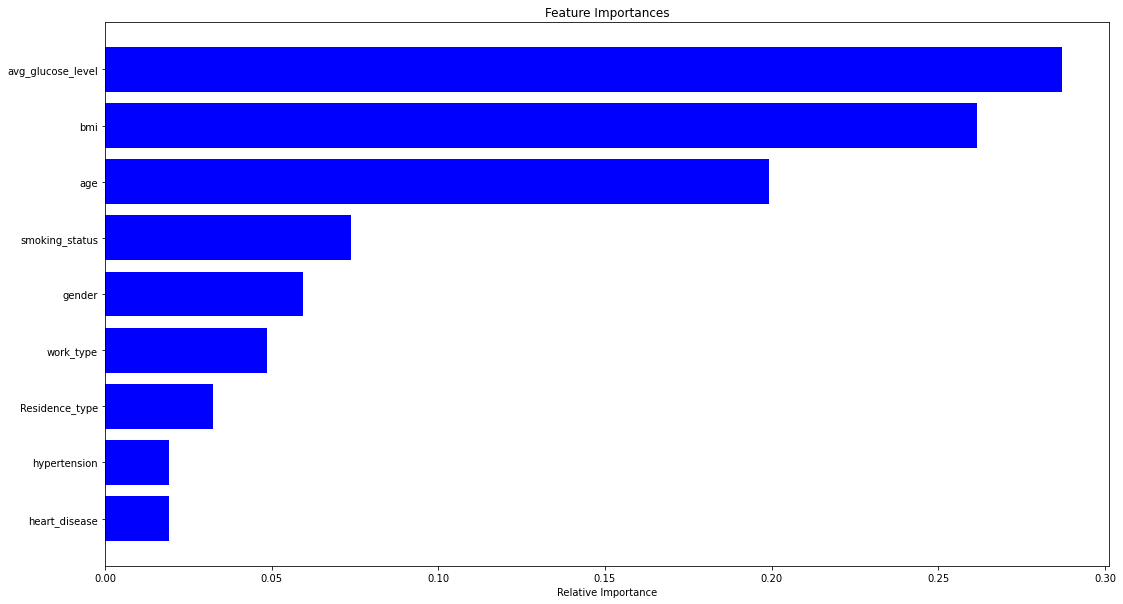

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x,y)
features=x.columns
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

## From the above plot we can see that "avg_glucose_level", "bmi" and "age" are the most Informative(Descriptive) Features.

## Saving the Preprocessed Dataset in a .csv file:

In [38]:
df.to_csv("Preprocessed_Stroke_Detector_Dataset.csv",index=False)

## creating a data report for our pre-processed data

In [40]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='FinalPreprocessedDataReport.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 62.67it/s]
